# Barvení grafu

In [125]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from IPython.display import display, clear_output
import numpy as np
import matplotlib.ticker as ticker


In [126]:
random.seed(35456)

### Dimacs format

In [127]:
Gd = nx.Graph()

def readdimacs(filename):

    file = open(filename, 'r')
    lines = file.readlines()
    
    Gd = nx.Graph()

    for line in lines:
        if line[0] == "e":
            vs = [int(s) for s in line.split() if s.isdigit()]
            Gd.add_edge(vs[0]-1, vs[1]-1)
    return Gd

# http://cedric.cnam.fr/~porumbed/graphs/
G1 = readdimacs('graphs/dsjc125.1.col')  
G2 = readdimacs('graphs/r125.1.col')
G3 = readdimacs('graphs/r125.5.col')
G4 = readdimacs('graphs/dsjc125.9.col')




## Color functions
different approaches to local search

In [128]:
def random_walk_graph_colors(G, colors, steps):
    # list of random colors to be used
    colmap = ["#"+f"{hex(random.randint(0, 2**24 - 1))}"[2:].zfill(6) for i in range(colors)]
    # randomly appointing colors to nodes
    colnum = [random.randint(0, len(colmap) - 1) for i in range(max(G.nodes) + 1)]
    s = 0
    while s < steps:
        random_index = random.randint(0, len(colnum) - 1)
        random_color = random.choice([i for i in range(0, colors) if i != colnum[random_index]])
        colnum[random_index] = random_color
        if not check_collisions(G, colnum):
            print(f"Stop - solution with {colors} colors found after {s} steps")
            break
        s += 1
    else:
        print("No solution found")
    colors = [colmap[c] for c in colnum]
    colors = [colors[i] for i in G.nodes()]
    nx.draw(G, node_color=colors, with_labels=True)


In [129]:
def hill_climb_graph_colors(G, colors, steps):
    valid_sol = None
    # list of random colors to be used
    colmap = ["#"+f"{hex(random.randint(0, 2**24 - 1))}"[2:].zfill(6) for i in range(colors)]
    # randomly appointing colors to nodes
    colnum = [random.randint(0, len(colmap) - 1) for i in range(max(G.nodes) + 1)]
    s = 0
    while s < steps:
        cols = check_collisions(G, colnum)
        if not cols:
            print(f"Stop - solution with {colors} colors found after {s} steps")
            valid_sol = colnum
            break
        best_change = find_best_change(G, colmap, colnum)
        if best_change[0] == 0:
            shuffle_collisions(G, colmap, colnum)
        else:
            colnum[best_change[1]] = best_change[2]
        s += 1
    else:
        print(f"No solution found - {cols} collisions")

    
    colors = [colmap[c] for c in colnum]
    colors = [colors[i] for i in G.nodes()]
    return cols, valid_sol


## Helper functions

In [130]:
def shuffle_collisions(graph, colmap, colnum):
    neighbours = list(graph.edges())
    for adj in neighbours:
        if colnum[adj[0]] == colnum[adj[1]] and random.random() < 0.5:
            colnum[adj[random.randint(0, 1)]] = random.randint(0, len(colmap) - 1)  


In [131]:
def find_best_change(G, colmap, colnum):
    # (number of collisions saved, node nr., new color)
    best_change = (0, None, None)
    for node in G.nodes:
        node_color = colnum[node]
        # number of neighbors of the ith color - starting with all 0s
        arr_neighbors_colors = [0 for i in range(len(colmap))]
        for neighbor in G.neighbors(node):
            arr_neighbors_colors[colnum[neighbor]] += 1
        # maximal number of collisions to be saved = current nr. of collisions - the lowest number of collisions from the remaining colors
        max_save = arr_neighbors_colors[node_color] - min(arr_neighbors_colors)
        # if it is the best so far, save it
        if max_save > best_change[0]:
            best_change = (max_save, node, arr_neighbors_colors.index(min(arr_neighbors_colors)))
    return best_change

## iscoloring function

In [132]:
def check_collisions(G, colnum):
    sum_collisions = 0
    neighbours = list(G.edges())
    for adj in neighbours:
        if colnum[adj[0]] == colnum[adj[1]]:
            sum_collisions += 1  
    return sum_collisions
    

## Barvení grafu dsjc125.9 44 barvami

In [133]:
n_colors = 44
n_collisions = []
valid_solutions = []
for i in range(10):
    collisions, solution = hill_climb_graph_colors(G4, n_colors, 5000)
    n_collisions.append(collisions)
    if solution: valid_solutions.append(solution)
            


No solution found - 11 collisions
No solution found - 9 collisions
No solution found - 7 collisions
No solution found - 9 collisions
No solution found - 5 collisions
Stop - solution with 44 colors found after 3318 steps
No solution found - 9 collisions
Stop - solution with 44 colors found after 4522 steps
No solution found - 9 collisions
No solution found - 5 collisions


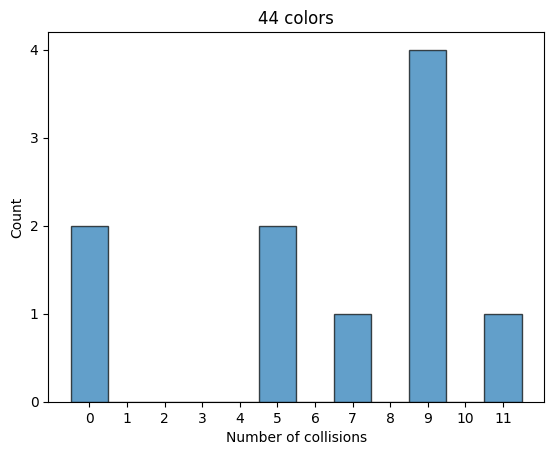

In [134]:
# Create a histogram
hist, edges, _ = plt.hist(
    arr, bins=range(int(min(n_collisions)), int(max(n_collisions)) + 2), edgecolor='black', alpha=0.7
)

# Calculate bin widths and midpoints
bin_width = edges[1] - edges[0]
bin_midpoints = edges[:-1] + bin_width / 2

# Force y-axis ticks to be integers and disable scientific notation
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

# Set x-ticks to bin midpoints
plt.xticks(bin_midpoints, [int(x) for x in bin_midpoints])

# Customize the plot
plt.xlabel('Number of collisions')
plt.ylabel('Count')
plt.title(f'{n_colors} colors')

# Display the plot
plt.show()

## Valid solution of the problem

In [139]:
valid_solution = valid_solutions[0]

In [141]:
print(valid_solution)
print("Počet kolizí: ", check_collisions(G4, valid_solution))

[13, 31, 36, 38, 7, 16, 32, 10, 26, 3, 41, 43, 2, 19, 38, 22, 3, 5, 41, 40, 31, 25, 42, 0, 39, 6, 13, 6, 31, 35, 15, 4, 4, 32, 19, 17, 33, 43, 38, 5, 17, 43, 28, 37, 39, 18, 21, 24, 42, 25, 35, 19, 10, 27, 26, 18, 20, 29, 16, 2, 1, 2, 4, 23, 23, 37, 11, 13, 33, 11, 20, 8, 22, 33, 18, 27, 20, 34, 14, 41, 24, 1, 5, 8, 9, 32, 25, 28, 24, 28, 39, 0, 23, 29, 9, 29, 10, 12, 27, 12, 21, 1, 7, 10, 12, 22, 8, 7, 15, 42, 34, 6, 36, 26, 8, 0, 9, 14, 40, 30, 16, 30, 36, 3, 35]
Počet kolizí:  0
